This is my exercise to understand box plot using materials from [TowardsDataScience](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd


/Volumes/GoogleDrive/My Drive/Statistics


In [3]:
breastcancer_df = pd.read_csv('data.csv')

In [4]:
breastcancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
breastcancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
breastcancer_df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [6]:
breastcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
breastcancer_df['diagnosis'].value_counts(dropna = False)

B    357
M    212
Name: diagnosis, dtype: int64

#### Calculate percentages of each types of cases

In [35]:
malignant = breastcancer_df[breastcancer_df['diagnosis']=='M']
m_length = len(malignant)
data_length = len(breastcancer_df)

print(f'Percentage of malignant cases are {round(100*(m_length/data_length),2)} percent')
print(f'Percentage of benign cases are {round(100*(1 - m_length/data_length),2)} percent')

Percentage of malignant cases are 37.26 percent
Percentage of benign cases are 62.74 percent


## Part 1: Make a basic box plot

#### Creating boxplot by using seaborn library

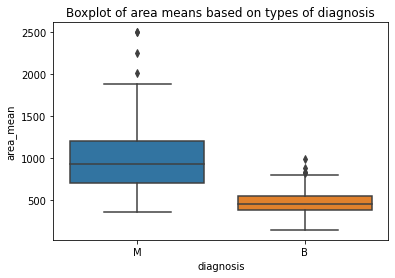

In [39]:
sns.boxplot(x = 'diagnosis', y = 'area_mean',data = breastcancer_df)
plt.title('Boxplot of area means based on types of diagnosis')
plt.savefig('sns_basic_area_mean_diagnosis.png')

#### Creating boxplot using matplotlib library

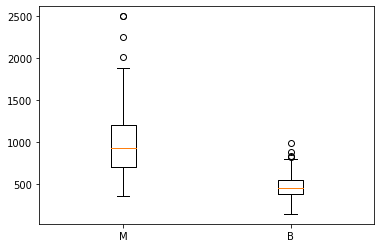

In [40]:
malignant = breastcancer_df[breastcancer_df['diagnosis'] == 'M']['area_mean']
benign = breastcancer_df[breastcancer_df['diagnosis'] == 'B']['area_mean']

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign],labels = ['M','B'])
plt.savefig('plt_basic_area_mean_diagnosis.png')

#### Another way of doing box plot is by using pandas

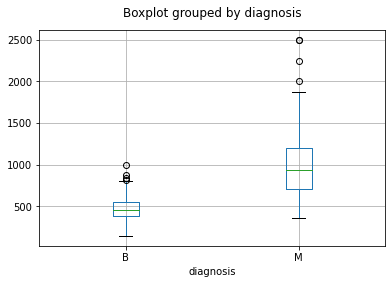

In [41]:
breastcancer_df.boxplot(column='area_mean',by = 'diagnosis')
plt.title('') # This to avoid the overlapping of titles
plt.savefig('pandas_area_mean_diagnosis.png')

#### Creating a notched boxplot

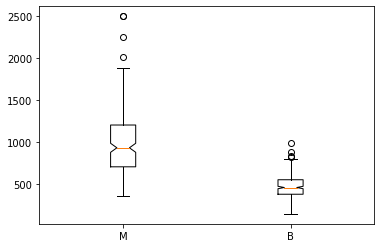

In [42]:
malignant = breastcancer_df[breastcancer_df['diagnosis'] == 'M']['area_mean']
benign = breastcancer_df[breastcancer_df['diagnosis'] == 'B']['area_mean']

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign],notch = True,labels = ['M','B'])
plt.savefig('plt_notched_diagnosis_area_mean.png')

## Part 2: Make nicer boxplots

#### Create nicer boxplot using seaborn

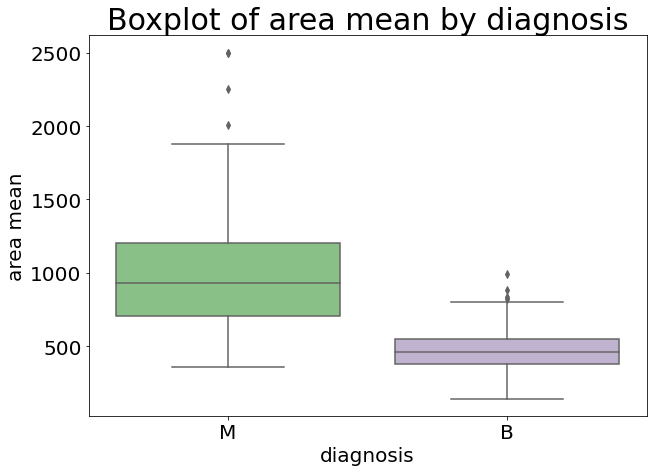

In [62]:
plt.figure(figsize = (10,7))

sns.boxplot(x='diagnosis',y='area_mean',data=breastcancer_df,palette = "Accent") # or pallette = "Set1"
plt.title('Boxplot of area mean by diagnosis',fontsize = 30)
plt.xlabel('diagnosis',fontsize =20)
plt.ylabel('area mean',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('nicer_seaborn_diagnosis_areamean.png')

#### Nicer notched boxplot

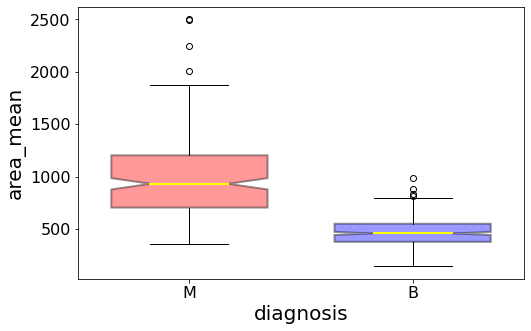

In [63]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([malignant,benign],
           notch = True,
           labels=['M', 'B'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('area_mean', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

plt.savefig('nicer_notchedBoxplot_basic_area_mean_diagnosis.png')